# Day 4- Exercise

In [100]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt

#### Data Prep

In [101]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [102]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [103]:
#merge the charts and tracks dataset
df = charts_df.merge(tracks_df, on='track_id', how='left')
#
df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2,-6.209,1,0.0454,0.19600,0.000000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10,-7.398,1,0.0590,0.69500,0.000000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0,-8.821,1,0.0307,0.09700,0.002720,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7,-6.126,1,0.0800,0.33800,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294595,2021-01-15,196,6lanRgr6wXibZr8KgzXxBl,A Thousand Years,Christina Perri,28709,7H55rcKCfwqkyDFH9wpKM6,Christina Perri,15yvc643iYfQtb6zh9NEJo,285120,...,0.407,10,-7.445,1,0.0267,0.30900,0.000961,0.1100,0.161,139.028
294596,2021-01-15,197,2FVpOsjT1iquZ3SpCjZ9Ne,Telepathy,BTS,28689,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2qehskW9lYGWfYb0xPZkrS,202313,...,0.669,5,-4.333,0,0.0428,0.00782,0.000000,0.1230,0.570,104.994
294597,2021-01-15,198,0rbKrBvZUYY9GN9l057BuY,"always, i'll care",Jeremy Zucker,28649,3gIRvgZssIb9aiirIg0nI3,Jeremy Zucker,5mkf4N44kdEwYgaOk3hRLF,146160,...,0.221,6,-12.623,1,0.0560,0.89700,0.000026,0.1100,0.677,105.165
294598,2021-01-15,199,4Dq2FjRkOTHcssggMdYK8J,MY TREASURE,TREASURE,28527,3KonOYiLsU53m4yT7gNotP,TREASURE,5tQDFmW8QrZdTsICpLQBTL,195982,...,0.785,6,-4.564,1,0.0780,0.11100,0.000000,0.1410,0.526,107.931


## Instructions

1. (*Easy- Individual Work*) Among those included in the Spotify charts, pick 1 artist you like to analyze. 

   a. Plot the streams and positions of their top 5 streamed songs.

   b. Compare these charts with streams and positions of what you feel to be a possible collaborator/competitor/related artist. 

   What insights can you draw from the data?

In [104]:
# Code for Part 1 here

2. (*Intermediate - Group Work*) A song may be classified as follows:

   - **Mainstay** - Song with high streams ($>X_1$ streams) and position ($>P_1$ position) all throughout the year
   - **Viral** - Song that reach the peak position fast with high increase in streams ($>X_2$ streams/day),
     followed by a rapid decline in position ($P_2$ places/day) and streams ($>X_3$ streams/day)
   - **Seasonal** - Song that consistently appear ($>C$ autocorrelation score, or some other metric) OR stay and garner considerable streams ($>X_4$ streams) within a certain season and go into low ranks/ disappear from the chart after the season
    
   a. In Google Jamboard, discuss among your group how you would define and set values to the thresholds that you will use to classify the songs according to the categories as described above. (You may add more thresholds to refine the definitions, as you see fit)
   
   b. Using your group's definition in (a) name as many songs as you can per classification and plot their streams and position as a time series.

# Paste link to Google Jamboard here

https://jamboard.google.com/d/1f50t6keOhMZpmKns83kmF_-PexPG9r3eh40sG0LP2Ls/edit?usp=sharing

In [105]:
# Code for Part 2 here
# Seperate the different tracks
df=df.sort_values(['track_id','date'])
df

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
16508,2017-03-24,109,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,28595,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,...,0.627,7,-6.029,1,0.0639,0.1310,0.0,0.0852,0.524,120.963
16736,2017-03-25,137,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,21908,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,...,0.627,7,-6.029,1,0.0639,0.1310,0.0,0.0852,0.524,120.963
16909,2017-03-26,110,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,25873,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,...,0.627,7,-6.029,1,0.0639,0.1310,0.0,0.0852,0.524,120.963
17057,2017-03-27,58,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,45818,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,...,0.627,7,-6.029,1,0.0639,0.1310,0.0,0.0852,0.524,120.963
17252,2017-03-28,53,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),ZAYN,53471,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2kGUeTGnkLOYlinKRJe47G,188490,...,0.627,7,-6.029,1,0.0639,0.1310,0.0,0.0852,0.524,120.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48601,2017-09-04,2,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,161175,06HL4z0CvFAxyc27GXpf02,Taylor Swift,0HG8fMDhvN2tH5uPHFsyZP,208198,...,0.779,2,-6.454,1,0.1350,0.0665,0.0,0.1550,0.453,160.000
48804,2017-09-05,5,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,143734,06HL4z0CvFAxyc27GXpf02,Taylor Swift,0HG8fMDhvN2tH5uPHFsyZP,208198,...,0.779,2,-6.454,1,0.1350,0.0665,0.0,0.1550,0.453,160.000
49004,2017-09-06,5,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,138364,06HL4z0CvFAxyc27GXpf02,Taylor Swift,0HG8fMDhvN2tH5uPHFsyZP,208198,...,0.779,2,-6.454,1,0.1350,0.0665,0.0,0.1550,0.453,160.000
49208,2017-09-07,9,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,126079,06HL4z0CvFAxyc27GXpf02,Taylor Swift,0HG8fMDhvN2tH5uPHFsyZP,208198,...,0.779,2,-6.454,1,0.1350,0.0665,0.0,0.1550,0.453,160.000


In [106]:
#transform the date column to a datetime
df['date'] = pd.to_datetime(df['date'])

In [107]:
dfclean = df.copy()

In [108]:
#determine if the next row is of the same track
dfclean['track_iddiff'] = dfclean['track_id']==dfclean['track_id'].shift(1)

In [109]:
#get the daily difference in position and streams
dfclean['positiondiff'] = dfclean['position'].diff()
dfclean['streamsdiff'] = dfclean['streams'].diff()

In [110]:
#remove the rows that are being preceeded by a different track
dftarget = dfclean[dfclean['track_iddiff']==True]

MAINSTAY X1=>50735 P1<=100

In [111]:
#get the tracks that have a daily position and streams according to the definition
mainstay=dftarget[(dftarget['streams']>=50375) & (dftarget['position']<= 100)]

In [112]:
#create a groups of the dates that lie one after the other
mainstay['grp_date'] = mainstay['date'].diff().dt.days.ne(1).cumsum()

<ipython-input-112-be57518f3115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainstay['grp_date'] = mainstay['date'].diff().dt.days.ne(1).cumsum()


In [113]:
mainstay[['date','grp_date']]

,date,grp_date
17252,2017-03-28,1
17450,2017-03-29,1
17647,2017-03-30,1
17851,2017-03-31,1
18053,2017-04-01,1
...,...,...
269462,2020-09-12,3241
48804,2017-09-05,3242
49004,2017-09-06,3242
49208,2017-09-07,3242


In [114]:
mainstayfinal = mainstay.groupby(['track_id','track_name','grp_date']).size().reset_index(name='numofdays').sort_values(by='numofdays', ascending=False)

In [115]:
mainstayfinal[mainstayfinal['numofdays']>=365]

,track_id,track_name,grp_date,numofdays
1497,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,1499,1065
849,1yDiru08Q6omDOGkZMPnei,Maybe The Night,850,852
657,1X4l4i472kW5ofFP8Xo0x0,Sana,658,671
2,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,3,636
906,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,907,628
2343,5l9g7py8RCblcvbZgGQgSd,Pagtingin,2347,512
3150,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3153,486
2520,65sEZZaxTjLMD8vNgPoMz5,Imahe,2524,456
2005,4u8RkgV6P4TLi89SmlUtv8,Mundo,2009,438
2353,5nMKJJ5Rl6X1yn58aVeICO,Bulong,2357,426


VIRAL X2>=15000 P<=-20 X3<=-20000

In [116]:
#make a copy of the working df
viral=dftarget.copy()

In [117]:
#get the position where in a track has reached its peak
maxpos = viral.loc[viral.groupby(['track_id'])['position'].idxmin()]

In [118]:
#get the tracks where in they reached their peak with an increase in streams greater than or equal to the identified X2
maxpos = maxpos[maxpos['streamsdiff']>=40000]
maxpos

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_iddiff,positiondiff,streamsdiff
290022,2020-12-24,23,01eo8yhZDkzYuog8FzYzgV,Star ng Pasko,ABS-CBN Music All Star,138863,2H4bbbOohoe9zhqEsiRi7j,ABS-CBN Music All Star,5eUnsp7rDGlEKIkMkJHYxy,267080,...,1,0.0293,0.2830,0.000000,0.2780,0.186,92.016,True,-48.0,79971.0
290039,2020-12-24,40,0247StOpd3AkeBQzANX4Zf,Do They Know It's Christmas? - 1984 Version,Band Aid,101728,35S20clEkkSNUo23ViaslZ,Band Aid,0Q96oESySVI3gLFTkhttn5,222533,...,1,0.0363,0.1640,0.000033,0.0992,0.349,115.412,True,-113.0,68209.0
72239,2017-12-31,40,0I20rLT2MJDhcF96AjbNYo,Stay,Zedd,87347,2qxJFvFYMEDqd7ui6kSAcq,Zedd,5auUsyFbwRARoWkOFopQ12,210400,...,0,0.0630,0.2530,0.000000,0.1130,0.543,102.039,True,-41.0,50493.0
179800,2019-06-22,1,0TK2YIli7K1leLovkQiNik,Señorita,Shawn Mendes,207460,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,2ZaX1FdZCwchXl1QZiD4O4,190960,...,0,0.0287,0.0370,0.000000,0.0945,0.750,116.947,True,-6.0,64196.0
145229,2018-12-31,30,0WdGQhoAP2LBsqr5Jhit2g,What Lovers Do,Maroon 5,100093,04gDigrS5kc9YWfZHwBETP,Maroon 5,2rdc6PDLUZFnaTf1dqUJsH,199849,...,0,0.0611,0.0788,0.000006,0.1000,0.419,110.001,True,-45.0,66475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267214,2020-09-01,15,7rrVN7f83kwaz2sGxoFnJY,Christmas in Our Hearts,Jose Mari Chan,111942,1EHAbA1GMYOfkh9ds9eNfS,Jose Mari Chan,3WPwRhJqWbl9lkv8DDq8jh,207000,...,1,0.0293,0.8410,0.000000,0.1370,0.399,72.534,True,-29.0,46312.0
216862,2019-12-24,63,7taXf5odg9xCAZERYfyOkS,Feliz Navidad,José Feliciano,74695,7K78lVZ8XzkjfRSI7570FF,José Feliciano,4E8tfxh5YBsHLtTHA1tMTv,182360,...,1,0.0442,0.5340,0.000000,0.3470,0.963,148.749,True,-73.0,51011.0
290004,2020-12-24,5,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,Bobby Helms,271156,38EmEgXkgK51MT2tPY0EoC,Bobby Helms,3wivyOdotHWZ9dcuXMjPKT,130973,...,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,True,-29.0,186327.0
95406,2018-04-26,7,7wrDRQgHlvDnimrRHfQZxt,Psycho (feat. Ty Dolla $ign),Post Malone,138616,246dkjvS1zLTtiykXe5h60,Post Malone,1Val8NiAXyp2yTBiwZ53Ju,220880,...,1,0.1060,0.5900,0.000000,0.1120,0.413,140.005,True,-50.0,88358.0


In [119]:
#make a dataframe of the tracks that comply to the first parameter
maxpostrack = maxpos['track_id']
potviral = viral[viral['track_id'].isin(maxpostrack)]

In [120]:
#get only those that saatisfy P2 and X3
decviral = potviral[(potviral['positiondiff']>=20) & (potviral['streamsdiff']<=-20000)]

In [121]:
#join the two variable
finalviral = pd.concat([maxpos, decviral])

In [122]:
#arrange the dataframe by track_id and date
finalviral=finalviral.sort_values(['track_id','date'])
finalviral

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_iddiff,positiondiff,streamsdiff
290022,2020-12-24,23,01eo8yhZDkzYuog8FzYzgV,Star ng Pasko,ABS-CBN Music All Star,138863,2H4bbbOohoe9zhqEsiRi7j,ABS-CBN Music All Star,5eUnsp7rDGlEKIkMkJHYxy,267080,...,1,0.0293,0.283,0.000000,0.2780,0.186,92.016,True,-48.0,79971.0
290247,2020-12-25,48,01eo8yhZDkzYuog8FzYzgV,Star ng Pasko,ABS-CBN Music All Star,59309,2H4bbbOohoe9zhqEsiRi7j,ABS-CBN Music All Star,5eUnsp7rDGlEKIkMkJHYxy,267080,...,1,0.0293,0.283,0.000000,0.2780,0.186,92.016,True,25.0,-79554.0
290039,2020-12-24,40,0247StOpd3AkeBQzANX4Zf,Do They Know It's Christmas? - 1984 Version,Band Aid,101728,35S20clEkkSNUo23ViaslZ,Band Aid,0Q96oESySVI3gLFTkhttn5,222533,...,1,0.0363,0.164,0.000033,0.0992,0.349,115.412,True,-113.0,68209.0
290268,2020-12-25,69,0247StOpd3AkeBQzANX4Zf,Do They Know It's Christmas? - 1984 Version,Band Aid,45601,35S20clEkkSNUo23ViaslZ,Band Aid,0Q96oESySVI3gLFTkhttn5,222533,...,1,0.0363,0.164,0.000033,0.0992,0.349,115.412,True,29.0,-56127.0
72239,2017-12-31,40,0I20rLT2MJDhcF96AjbNYo,Stay,Zedd,87347,2qxJFvFYMEDqd7ui6kSAcq,Zedd,5auUsyFbwRARoWkOFopQ12,210400,...,0,0.0630,0.253,0.000000,0.1130,0.543,102.039,True,-41.0,50493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144051,2018-12-25,52,7xapw9Oy21WpfEcib2ErSA,Mistletoe,Justin Bieber,50368,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,63MKT9hwmiMFFdFp5SdB1p,182946,...,0,0.0467,0.498,0.000000,0.0794,0.854,161.993,True,25.0,-59765.0
144385,2018-12-26,186,7xapw9Oy21WpfEcib2ErSA,Mistletoe,Justin Bieber,20560,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,63MKT9hwmiMFFdFp5SdB1p,182946,...,0,0.0467,0.498,0.000000,0.0794,0.854,161.993,True,134.0,-29808.0
217053,2019-12-25,54,7xapw9Oy21WpfEcib2ErSA,Mistletoe,Justin Bieber,59323,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,63MKT9hwmiMFFdFp5SdB1p,182946,...,0,0.0467,0.498,0.000000,0.0794,0.854,161.993,True,29.0,-59588.0
290011,2020-12-24,12,7xapw9Oy21WpfEcib2ErSA,Mistletoe,Justin Bieber,223693,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,63MKT9hwmiMFFdFp5SdB1p,182946,...,0,0.0467,0.498,0.000000,0.0794,0.854,161.993,True,-31.0,147747.0


In [123]:
#preparation to remove the tracks that their peak was not directly followed by a sharp declind
finalviral['track_iddiff'] = finalviral['track_id']==finalviral['track_id'].shift(-1)
finalviral['positiondiff1'] = finalviral['positiondiff'].shift(-1)
finalviral['streamsdiff1'] = finalviral['streamsdiff'].shift(-1)
finalviral['datediff'] = finalviral['date'].diff(periods=-1)

In [124]:
#remove entries where in the following track in the database is not of the same track 
finalviral = finalviral[finalviral['track_iddiff']==True]

In [125]:
#get the trackes that were directly preceeded by a sharp decline
finalviral=finalviral[(finalviral['positiondiff']<0) & (finalviral['positiondiff1']>0)].sort_values(by='datediff', ascending = False)
finalviral

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,instrumentalness,liveness,valence,tempo,track_iddiff,positiondiff,streamsdiff,positiondiff1,streamsdiff1,datediff
290022,2020-12-24,23,01eo8yhZDkzYuog8FzYzgV,Star ng Pasko,ABS-CBN Music All Star,138863,2H4bbbOohoe9zhqEsiRi7j,ABS-CBN Music All Star,5eUnsp7rDGlEKIkMkJHYxy,267080,...,0.000000,0.2780,0.186,92.016,True,-48.0,79971.0,25.0,-79554.0,-1 days
94434,2018-04-21,35,6WbADFqMvR8N5u0BvtsWQE,Without You (feat. Sandro Cavazza),Avicii,66874,1vCWHaC5f2uS3yhpwWbIA6,Avicii,6LaLU27ZPXimJIbpbiOahr,181672,...,0.000000,0.0404,0.279,134.009,True,-161.0,47446.0,44.0,-34112.0,-1 days
290017,2020-12-24,18,3qCeq0rWK67SoBDgFd2sId,Feliz Navidad,José Feliciano,154449,7K78lVZ8XzkjfRSI7570FF,José Feliciano,6leYmQzvQjlUtmpNIL9XYQ,182306,...,0.000002,0.2990,0.967,148.733,True,-75.0,106876.0,23.0,-89581.0,-1 days
264015,2020-08-16,16,4KtAI0WOLiaeOfBT87shZG,Kung Pwede Lang,Emman,96336,3FwNjtXQCdxpDOXmgJQGnG,Emman,6z0cwwwXZ3fU7c7i7dNdl1,194811,...,0.000000,0.3040,0.387,169.983,True,-102.0,66326.0,26.0,-27347.0,-1 days
290057,2020-12-24,58,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),Nat King Cole,81539,7v4imS0moSyGdXyLgVTIV7,Nat King Cole,6vBGI5522jvPi0ZZuGQNp4,192160,...,0.000081,0.1380,0.209,78.696,True,-133.0,51387.0,29.0,-42611.0,-1 days
290029,2020-12-24,30,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...,Frank Sinatra,128118,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,4XbPmVHP7EYBMoE7ZVjKCU,155453,...,0.000000,0.3620,0.836,142.169,True,-79.0,85331.0,23.0,-72758.0,-1 days
143859,2018-12-24,60,5ASM6Qjiav2xPe7gRkQMsQ,Sleigh Ride,The Ronettes,66453,7CyeXFnOrfC1N6z4naIpgo,The Ronettes,2kzkwgOFAtRsDsas5Hi0Qu,181266,...,0.000002,0.3160,0.853,91.751,True,-92.0,43152.0,44.0,-37515.0,-1 days
143848,2018-12-24,49,5Q2P43CJra0uRAogjHyJDK,"Baby, It's Cold Outside (feat. Meghan Trainor)",Brett Eldredge,74172,0qSX3s5pJnAlSsgsCne8Cz,Brett Eldredge,6FjK2XLQJloz36NgRciCHv,173560,...,0.000000,0.2660,0.684,113.998,True,-74.0,47796.0,40.0,-41938.0,-1 days
143821,2018-12-24,22,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,Andy Williams,121416,4sj6D0zlMOl25nprDJBiU9,Andy Williams,4dcJHxlOJwtyypL7sx1qch,151933,...,0.000000,0.1170,0.776,201.629,True,-33.0,74089.0,24.0,-65388.0,-1 days
290048,2020-12-24,49,5xDrO9DEDJGUQGfyoHvgDJ,Last Christmas,Ariana Grande,88579,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,5MfeQZrrNfMqcaq03U9qOr,203653,...,0.000000,0.1090,0.789,205.945,True,-128.0,57362.0,36.0,-48100.0,-1 days


In [126]:
#check for the diffeence in date from the sharp rise and sharp fall
np.unique(list(finalviral['datediff']))

array([Timedelta('-530 days +00:00:00'), Timedelta('-98 days +00:00:00'),
       Timedelta('-4 days +00:00:00'), Timedelta('-2 days +00:00:00'),
       Timedelta('-1 days +00:00:00')], dtype=object)

In [127]:
#get the tracks that only took 1 day or 2 to get a sharp downward trend
finalviral[(finalviral['datediff']=='-2 days') |\
            (finalviral['datediff']=='-1 days')]

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,instrumentalness,liveness,valence,tempo,track_iddiff,positiondiff,streamsdiff,positiondiff1,streamsdiff1,datediff
290022,2020-12-24,23,01eo8yhZDkzYuog8FzYzgV,Star ng Pasko,ABS-CBN Music All Star,138863,2H4bbbOohoe9zhqEsiRi7j,ABS-CBN Music All Star,5eUnsp7rDGlEKIkMkJHYxy,267080,...,0.000000,0.2780,0.186,92.016,True,-48.0,79971.0,25.0,-79554.0,-1 days
94434,2018-04-21,35,6WbADFqMvR8N5u0BvtsWQE,Without You (feat. Sandro Cavazza),Avicii,66874,1vCWHaC5f2uS3yhpwWbIA6,Avicii,6LaLU27ZPXimJIbpbiOahr,181672,...,0.000000,0.0404,0.279,134.009,True,-161.0,47446.0,44.0,-34112.0,-1 days
290017,2020-12-24,18,3qCeq0rWK67SoBDgFd2sId,Feliz Navidad,José Feliciano,154449,7K78lVZ8XzkjfRSI7570FF,José Feliciano,6leYmQzvQjlUtmpNIL9XYQ,182306,...,0.000002,0.2990,0.967,148.733,True,-75.0,106876.0,23.0,-89581.0,-1 days
264015,2020-08-16,16,4KtAI0WOLiaeOfBT87shZG,Kung Pwede Lang,Emman,96336,3FwNjtXQCdxpDOXmgJQGnG,Emman,6z0cwwwXZ3fU7c7i7dNdl1,194811,...,0.000000,0.3040,0.387,169.983,True,-102.0,66326.0,26.0,-27347.0,-1 days
290057,2020-12-24,58,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),Nat King Cole,81539,7v4imS0moSyGdXyLgVTIV7,Nat King Cole,6vBGI5522jvPi0ZZuGQNp4,192160,...,0.000081,0.1380,0.209,78.696,True,-133.0,51387.0,29.0,-42611.0,-1 days
290029,2020-12-24,30,4kKdvXD0ez7jp1296JmAts,Let It Snow! Let It Snow! Let It Snow! (with T...,Frank Sinatra,128118,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,4XbPmVHP7EYBMoE7ZVjKCU,155453,...,0.000000,0.3620,0.836,142.169,True,-79.0,85331.0,23.0,-72758.0,-1 days
143859,2018-12-24,60,5ASM6Qjiav2xPe7gRkQMsQ,Sleigh Ride,The Ronettes,66453,7CyeXFnOrfC1N6z4naIpgo,The Ronettes,2kzkwgOFAtRsDsas5Hi0Qu,181266,...,0.000002,0.3160,0.853,91.751,True,-92.0,43152.0,44.0,-37515.0,-1 days
143848,2018-12-24,49,5Q2P43CJra0uRAogjHyJDK,"Baby, It's Cold Outside (feat. Meghan Trainor)",Brett Eldredge,74172,0qSX3s5pJnAlSsgsCne8Cz,Brett Eldredge,6FjK2XLQJloz36NgRciCHv,173560,...,0.000000,0.2660,0.684,113.998,True,-74.0,47796.0,40.0,-41938.0,-1 days
143821,2018-12-24,22,5hslUAKq9I9CG2bAulFkHN,It's the Most Wonderful Time of the Year,Andy Williams,121416,4sj6D0zlMOl25nprDJBiU9,Andy Williams,4dcJHxlOJwtyypL7sx1qch,151933,...,0.000000,0.1170,0.776,201.629,True,-33.0,74089.0,24.0,-65388.0,-1 days
290048,2020-12-24,49,5xDrO9DEDJGUQGfyoHvgDJ,Last Christmas,Ariana Grande,88579,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,5MfeQZrrNfMqcaq03U9qOr,203653,...,0.000000,0.1090,0.789,205.945,True,-128.0,57362.0,36.0,-48100.0,-1 days


Text(0.5, 1.0, 'Spotify Daily Streams: 911')

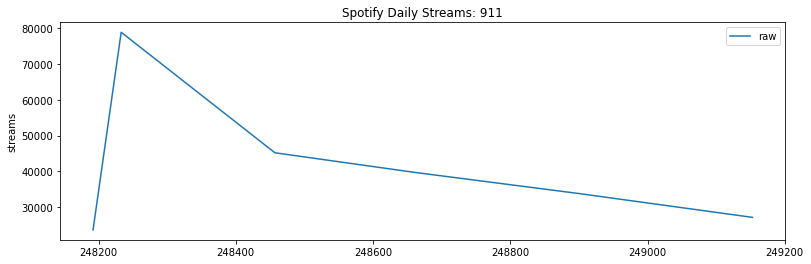

In [128]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=='911']['streams']

data1.plot(ax=ax, label='raw')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: 911')

In [129]:
finalviral.describe()

,position,streams,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,positiondiff,streamsdiff,positiondiff1,streamsdiff1,datediff
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52
mean,33.000000,129540.307692,198824.692308,67.750000,0.588192,0.567365,3.923077,-8.255981,0.865385,0.055756,0.404192,0.000019,0.177204,0.597038,124.859577,-75.519231,84041.576923,43.480769,-56453.307692,-14 days +17:04:36.923076923
std,22.268416,71900.343663,51186.023711,23.727931,0.144349,0.194969,3.117604,3.066317,0.344642,0.041335,0.314084,0.000109,0.120689,0.229182,37.223577,40.291823,48226.077272,23.453325,23000.469014,74 days 06:47:36.953309747
min,1.000000,64786.000000,117146.000000,3.000000,0.234000,0.178000,0.000000,-15.231000,0.000000,0.025300,0.001300,0.000000,0.040400,0.186000,67.196000,-161.000000,41974.000000,20.000000,-145460.000000,-530 days +00:00:00
25%,13.750000,76715.250000,170956.250000,57.000000,0.512750,0.462500,1.750000,-9.462000,1.000000,0.035175,0.130250,0.000000,0.081700,0.396000,94.056000,-102.250000,49934.000000,26.750000,-66417.500000,-2 days +18:00:00
50%,31.500000,98838.000000,195532.500000,73.000000,0.606500,0.586000,2.500000,-7.560000,1.000000,0.041250,0.359500,0.000000,0.129500,0.600500,117.856000,-69.500000,63837.000000,36.000000,-49185.500000,-1 days +00:00:00
75%,51.750000,156267.750000,225658.750000,85.250000,0.676750,0.726250,6.000000,-5.943250,1.000000,0.054325,0.643000,0.000002,0.286500,0.793250,150.054750,-44.000000,112061.500000,51.750000,-41054.250000,-1 days +00:00:00
max,80.000000,317313.000000,418133.000000,96.000000,0.874000,0.873000,11.000000,-2.763000,1.000000,0.219000,0.957000,0.000786,0.519000,0.967000,205.945000,-11.000000,208821.000000,136.000000,-20730.000000,-1 days +00:00:00


SEASONAL

Finding seasonal tracks based on ACF

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [132]:
#rearrange df by date
df=df.sort_values('date')
df

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
70,2017-01-01,71,6nxQdXa1uAL0rY72wPZu89,Love Me Now,John Legend,24872,5y2Xq6xcjJb2jVM54GHK3t,John Legend,7xMjYDrgPLp1ReFGAOyS1O,210293,...,0.762,8,-3.842,1,0.0865,0.59100,0.000000,0.0763,0.709,123.889
119,2017-01-01,120,2Z8WuEywRWYTKe1NybPQEW,Ride,Twenty One Pilots,15305,3YQKmKGau1PzlVlkL1iodx,Twenty One Pilots,3cQO7jp5S9qLBoIVtbkSM1,214506,...,0.713,6,-5.355,1,0.0393,0.00835,0.000000,0.1130,0.566,74.989
41,2017-01-01,42,4QdovcM8j50QPlyR7tH4xe,You & Me,Marc E. Bassy,50977,3tQx1LPXbsYjE9VwN1Peaa,Marc E. Bassy,07BmX119kPbbYsZPzISvqw,218480,...,0.650,1,-8.376,1,0.1920,0.03980,0.000000,0.1860,0.663,85.026
132,2017-01-01,133,67EY6aDoIx8czEPS6a2AaI,The Man Who Can't Be Moved,The Script,14488,3AQRLZ9PuTAozP28Skbq8V,The Script,5gCo4z8XZ0T16nJmnw9wnG,241466,...,0.629,10,-5.024,1,0.0264,0.42500,0.000000,0.0978,0.325,99.955
158,2017-01-01,159,11KJSRSgaDxqydKYiD2Jew,Too Good,Drake,12469,3TVXtAsR1Inumwj472S9r4,Drake,3hARKC8cinq3mZLLAEaBh9,263373,...,0.648,7,-7.805,1,0.1170,0.05730,0.000035,0.1020,0.392,117.983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294559,2021-01-15,160,4a6q8CR2hzLk2plDkSxkfD,I.F.L.Y.,Bazzi,30830,4GvEc3ANtPPjt1ZJllr5Zl,Bazzi,4ZKdRW0AH9sxV09NmWsTkW,165714,...,0.519,2,-4.823,1,0.0385,0.37900,0.000000,0.1300,0.554,104.954
294589,2021-01-15,190,6fxVffaTuwjgEk5h9QyRjy,Photograph,Ed Sheeran,29017,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,6NoBzYmh5gUusGPCfg0pct,258986,...,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989
294475,2021-01-15,76,6T6D9CIrHkALcHPafDFA6L,Vibez,ZAYN,49585,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,2yuQqhSklmfWgn8lmJNk5t,163346,...,0.671,7,-7.450,1,0.0842,0.24100,0.017800,0.1200,0.297,96.924
294425,2021-01-15,26,0knRQzgvbUed6K74mX81hG,Kabilang Buhay,Bandang Lapis,94553,4slXciON4jYY6mqE9LjSFx,Bandang Lapis,1bXVfDuQen1YkHWKudAi2c,325024,...,0.352,1,-14.428,0,0.0301,0.25100,0.000005,0.1970,0.203,139.647


In [141]:
#for the computation 
import statsmodels.api as sm

In [162]:
#creating a data frame with the track_id as index and and empty column fr acf
acfdf = df.iloc[:,2:4].drop_duplicates(subset=['track_id'])
acfdf['acf']=np.nan
acfdf = acfdf.set_index('track_id')

In [195]:
#this code will iterate all the tracks and compute for its mean ACF
for l in acfdf.index:
    #get all dates
    data1 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
    #get total streams of all charting songs of the artist per day
    track_streams = df[df['track_id']==l].groupby('date')[['streams']].sum().reset_index().set_index('date')
    #merge with complete dates
    data1['streams']=track_streams
    #fill days with no streams with 0
    data1['streams']=data1['streams'].fillna(0)
    #create a database for the absolute value of the acf coefficient of the track l. lag used was for a year
    x = pd.DataFrame(abs(sm.tsa.acf(data1, nlags=365)))
    #for lag 0 acf is always 1 so it was removed. Then the rest was we found the mean
    x = x.iloc[1:].mean()
    acfdf['acf'][l]=x
    


D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-195-d6b55cbdaf7e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acfdf['acf'][l]=x


In [196]:
acfdf.sort_values('acf', ascending = False)

,track_name,acf
track_id,,
0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,0.657525
39V6cEoNFwDFRJEOKyj4OR,Let Me Be the One,0.615825
2PcbtMoqOlGSzOfyJlkB06,Your Love - Dolce Amore Teleserye Theme,0.611984
1VvFtp71ibaXiHxurBlXuw,Before I Let You Go,0.607111
67EY6aDoIx8czEPS6a2AaI,The Man Who Can't Be Moved,0.602867
...,...,...
5CBnWXD8M7e8Q6WubFLtXy,Better,0.000084
6T6D9CIrHkALcHPafDFA6L,Vibez,0.000084
3jjBPF4NDMCU51psU8JPpR,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",0.000084


In [199]:
acfdf.describe()

,acf
count,3284.000000
mean,0.086248
std,0.117996
min,0.000084
25%,0.004042
50%,0.033207
75%,0.122026
max,0.657525


In [202]:
acfdf=acfdf[acfdf['acf']>=0.122].sort_values('acf', ascending = False)
acfdf

,track_name,acf
track_id,,
0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,0.657525
39V6cEoNFwDFRJEOKyj4OR,Let Me Be the One,0.615825
2PcbtMoqOlGSzOfyJlkB06,Your Love - Dolce Amore Teleserye Theme,0.611984
1VvFtp71ibaXiHxurBlXuw,Before I Let You Go,0.607111
67EY6aDoIx8czEPS6a2AaI,The Man Who Can't Be Moved,0.602867
...,...,...
2xJlJ7vhnt8yBfA4vwcwZW,Pakinabang,0.122297
222B3aljXx6fFwKmFjuBED,Woman Like Me (feat. Nicki Minaj),0.122077
0BEpSEV02FM1N5gcw2fsJC,Kung Ayaw Mo Wag Mo - Recorded at Kodama Studi...,0.122041


checking the plots

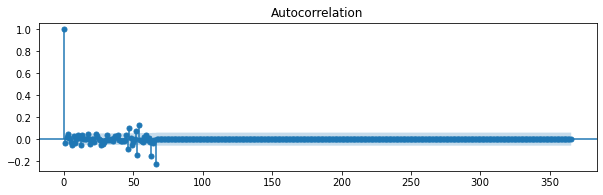

In [203]:
#get all dates
data1 = pd.DataFrame({'date':pd.unique(df['date'])}).set_index('date').asfreq('d')
#get total streams of all charting songs of the artist per day
track_streams = df[df['track_id']=='2J0X46UkpfLlWbuCXFgDLr'].groupby('date')[['streams']].sum().reset_index().set_index('date')
#merge with complete dates
data1['streams']=track_streams
#fill days with no streams with 0
data1['streams']=data1['streams'].fillna(0)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)

#full year lag
acf = plot_acf(data1[['streams']].interpolate().diff()[1:], lags=365, ax=ax1)

In [215]:
dfbydate = df
dfbydate = dfbydate.set_index('date')

Text(0.5, 1.0, 'Spotify Daily Streams: 911')

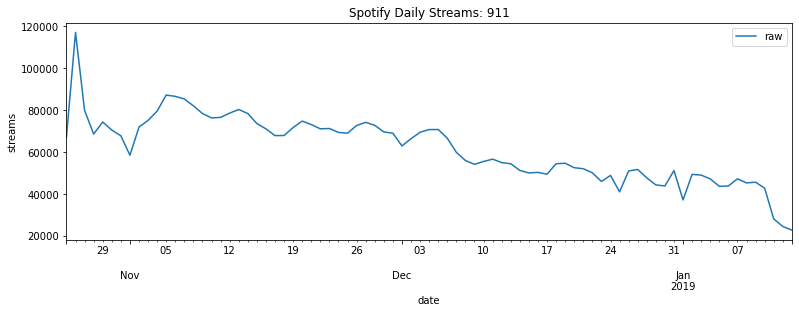

In [204]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

plotter = dfbydate[dfbydate['track_name']=='Waste It On Me (feat. BTS)']['streams']

plotter.plot(ax=ax, label='raw')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: 911')

In [220]:
dfbymonth = dfbydate.groupby(['track_id','track_name'])['streams'].resample('MS').sum()
dfbymonth

track_id                track_name                            date      
000xQL6tZNLJzIrtIgxqSl  Still Got Time (feat. PARTYNEXTDOOR)  2017-03-01     352537
                                                              2017-04-01    1245432
                                                              2017-05-01    1073923
                                                              2017-06-01      36169
003eoIwxETJujVWmNFMoZy  Growing Pains                         2018-06-01     795707
                                                                             ...   
7zFXmv6vqI4qOt4yGf3jYZ  Get You (feat. Kali Uchis)            2019-03-01      98847
7zLGHiDWd9T1Rxw4PQCb13  Walk On Water (feat. Beyoncé)         2017-11-01      24731
7zTx8ePYAmPFQuxP3xlXZn  Light                                 2017-01-01     674582
                                                              2017-02-01     405227
7zgqtptZvhf8GEmdsM2vp2  ...Ready For It?                      2017-09-01     688426
Nam

In [230]:
dfbymonth = dfbydate.groupby(['track_id','track_name']).resample('MS').agg({'streams': ['sum'], 'position': ['mean']}).reset_index()
dfbymonth

,track_id,track_name,date,streams,position
,,,,sum,mean
0,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),2017-03-01,352537,77.250000
1,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),2017-04-01,1245432,65.533333
2,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),2017-05-01,1073923,78.448276
3,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),2017-06-01,36169,188.000000
4,003eoIwxETJujVWmNFMoZy,Growing Pains,2018-06-01,795707,60.625000
...,...,...,...,...,...
18850,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),2019-03-01,98847,171.500000
18851,7zLGHiDWd9T1Rxw4PQCb13,Walk On Water (feat. Beyoncé),2017-11-01,24731,125.000000
18852,7zTx8ePYAmPFQuxP3xlXZn,Light,2017-01-01,674582,117.290323


In [234]:
dfbymonth.iloc[:,3]

0         352537
1        1245432
2        1073923
3          36169
4         795707
          ...   
18850      98847
18851      24731
18852     674582
18853     405227
18854     688426
Name: (streams, sum), Length: 18855, dtype: int64

In [235]:
maxmonthstream = dfbymonth[dfbymonth.iloc[:,3]>1522050]
maxmonthstream

,track_id,track_name,date,streams,position
,,,,sum,mean
29,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-07-01,2441382,27.483871
30,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-08-01,3781458,10.967742
31,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-09-01,4557969,3.900000
32,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-10-01,5765873,6.516129
33,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-11-01,5883961,6.666667
...,...,...,...,...,...
18784,7y4JznkAv2W3IKw9T1o2VK,New,2018-01-01,1899577,44.354839
18786,7y4JznkAv2W3IKw9T1o2VK,New,2018-03-01,1600981,52.354839
18818,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-06-01,2701544,27.433333


In [237]:
minmonthpos = dfbymonth[dfbymonth.iloc[:,4]>150]
minmonthpos

,track_id,track_name,date,streams,position
,,,,sum,mean
3,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),2017-06-01,36169,188.000000
6,007d7JT41sSc1HqWTs4uw7,Love Myself,2017-02-01,19140,177.000000
7,0087fDVeNhuyMtST91RMjv,Kundiman,2018-05-01,22766,184.000000
8,0087fDVeNhuyMtST91RMjv,Kundiman,2018-06-01,247912,175.090909
9,0087fDVeNhuyMtST91RMjv,Kundiman,2018-07-01,315227,181.928571
...,...,...,...,...,...
18840,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),2018-05-01,202080,185.200000
18841,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),2018-06-01,60964,187.000000
18842,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),2018-07-01,20201,199.000000


In [239]:
unique = maxmonthstream['track_id'].unique()
unique

array(['00mBzIWv5gHOYxwuEJXjOG', '011GTFfE8rqTRMhz5g8IAW',
       '017PF4Q3l4DBUiWoXk4OWT', '01YEqVPCm0vqRLA9w43bic',
       '029B34AzPVXzOQCyaJpkdH', '02GtNoUv85fOPEaCTlpYzr',
       '04DwTuZ2VBdJCCC5TROn7L', '04ZTP5KsCypmtCmQg5tH9R',
       '05CwHjIk71RXVU40boRMnR', '06cUybZMETs4i3yQO1f7p3',
       '07JZJ9YJRaiUAz9Bv8wgwH', '08bNPGLD8AhKpnnERrAc6G',
       '09IStsImFySgyp0pIQdqAc', '09oZ9eXQ2fo6YDrPzJqAoP',
       '0B8B8cVRFIG1yznoQe7c9s', '0BaMZMMEG7GWrUYsoGw8Yg',
       '0BkKdJSpKqzYLEneerSHq3', '0Eqg0CQ7bK3RQIMPw1A7pl',
       '0Fh6hgq979963fIxr2VBF2', '0G5qmu4TsdUH19zdcbI9Ui',
       '0GHwNr0lqf8jpc9wesmnHo', '0GU5GuJQQEnnREO2FxnVPT',
       '0Gl5s8IhMmQE5YQwM8Qx1J', '0Jlcvv8IykzHaSmj49uNW8',
       '0KKkJNfGyhkQ5aFogxQAPU', '0Nhu3zSYbEz32IYiobV75e',
       '0NiXXAI876aGImAd6rTj8w', '0PG9fbaaHFHfre2gUVo7AN',
       '0QsvXIfqM0zZoerQfsI9lm', '0RGUIOZtmOXTWOy5EjvQbP',
       '0RUTnY2B3s05fZuCHsNaUP', '0RiRZpuVRbi7oqRdSMwhQY',
       '0Ryd8975WihbObpp5cPW1t', '0TK2YIli7K1leLovkQiNik

In [240]:
minmonthpos = minmonthpos[minmonthpos['track_id'].isin(unique)]
minmonthpos

,track_id,track_name,date,streams,position
,,,,sum,mean
24,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-02-01,202593,180.444444
25,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-03-01,746836,156.129032
26,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-04-01,657100,159.892857
27,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-05-01,759378,152.096774
63,011GTFfE8rqTRMhz5g8IAW,Repeat,2020-04-01,281190,175.692308
...,...,...,...,...,...
18675,7vRriwrloYVaoAe3a9wJHe,"i hate u, i love u (feat. olivia o'brien)",2017-05-01,550813,180.896552
18676,7vRriwrloYVaoAe3a9wJHe,"i hate u, i love u (feat. olivia o'brien)",2017-06-01,89591,196.600000
18816,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-04-01,263009,152.000000


In [241]:
uniquep = minmonthpos['track_id'].unique()
uniquep

array(['00mBzIWv5gHOYxwuEJXjOG', '011GTFfE8rqTRMhz5g8IAW',
       '017PF4Q3l4DBUiWoXk4OWT', '01YEqVPCm0vqRLA9w43bic',
       '02GtNoUv85fOPEaCTlpYzr', '04DwTuZ2VBdJCCC5TROn7L',
       '04ZTP5KsCypmtCmQg5tH9R', '05CwHjIk71RXVU40boRMnR',
       '06cUybZMETs4i3yQO1f7p3', '07JZJ9YJRaiUAz9Bv8wgwH',
       '08bNPGLD8AhKpnnERrAc6G', '09IStsImFySgyp0pIQdqAc',
       '0B8B8cVRFIG1yznoQe7c9s', '0BaMZMMEG7GWrUYsoGw8Yg',
       '0BkKdJSpKqzYLEneerSHq3', '0Fh6hgq979963fIxr2VBF2',
       '0G5qmu4TsdUH19zdcbI9Ui', '0GHwNr0lqf8jpc9wesmnHo',
       '0GU5GuJQQEnnREO2FxnVPT', '0Gl5s8IhMmQE5YQwM8Qx1J',
       '0Jlcvv8IykzHaSmj49uNW8', '0KKkJNfGyhkQ5aFogxQAPU',
       '0NiXXAI876aGImAd6rTj8w', '0PG9fbaaHFHfre2gUVo7AN',
       '0QsvXIfqM0zZoerQfsI9lm', '0RGUIOZtmOXTWOy5EjvQbP',
       '0RiRZpuVRbi7oqRdSMwhQY', '0Ryd8975WihbObpp5cPW1t',
       '0Vmk6Ebk4QBq7r0VAz2a6s', '0VsGaRXR5WAzpu51unJTis',
       '0WOvSEVpUGkNufX0w0M06F', '0XPsOSYzDJZJArevQNm2AR',
       '0YHUITU3w6ws1v8ehT264g', '0YyM8aEdbjGfLWPn6fdcn7

In [242]:
maxmonthstream = maxmonthstream[maxmonthstream['track_id'].isin(uniquep)]
maxmonthstream

,track_id,track_name,date,streams,position
,,,,sum,mean
29,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-07-01,2441382,27.483871
30,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-08-01,3781458,10.967742
31,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-09-01,4557969,3.900000
32,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-10-01,5765873,6.516129
33,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-11-01,5883961,6.666667
...,...,...,...,...,...
18641,7vGuf3Y35N4wmASOKLUVVU,Silence,2017-12-01,1732883,55.548387
18671,7vRriwrloYVaoAe3a9wJHe,"i hate u, i love u (feat. olivia o'brien)",2017-01-01,2293707,33.741935
18818,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-06-01,2701544,27.433333


In [249]:
minmax = pd.concat([maxmonthstream,minmonthpos]).sort_values(['track_id','date'])
minmax

,track_id,track_name,date,streams,position
,,,,sum,mean
24,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-02-01,202593,180.444444
25,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-03-01,746836,156.129032
26,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-04-01,657100,159.892857
27,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-05-01,759378,152.096774
29,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-07-01,2441382,27.483871
...,...,...,...,...,...
18818,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-06-01,2701544,27.433333
18819,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-07-01,3124506,23.129032
18820,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-08-01,2435982,30.451613


In [250]:
#preparation to remove the tracks that their peak was not directly followed by a sharp declind
minmax['track_iddiff'] = minmax['track_id']==minmax['track_id'].shift(-1)
minmax['positiondiff1'] = minmax.iloc[:,4].shift(-1)
minmax['streamsdiff1'] = minmax.iloc[:,3].diff()
minmax['datediff'] = minmax['date'].diff(periods=-1)
minmax = minmax[minmax['track_iddiff']==True]

In [245]:
minmax

,track_id,track_name,date,streams,position,track_iddiff,positiondiff1,streamsdiff1,datediff
,,,,sum,mean,,,,
24,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-02-01,202593,180.444444,True,156.129032,746836.0,-28 days
25,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-03-01,746836,156.129032,True,159.892857,657100.0,-31 days
26,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-04-01,657100,159.892857,True,152.096774,759378.0,-30 days
27,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-05-01,759378,152.096774,True,27.483871,2441382.0,-61 days
29,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,2018-07-01,2441382,27.483871,True,10.967742,3781458.0,-31 days
...,...,...,...,...,...,...,...,...,...
18816,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-04-01,263009,152.000000,True,27.433333,2701544.0,-61 days
18818,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-06-01,2701544,27.433333,True,23.129032,3124506.0,-30 days
18819,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),2020-07-01,3124506,23.129032,True,30.451613,2435982.0,-31 days


3. (*Advanced - Individual, Optional*) What percentage of Spotify charts streams from 2018-2020 are from mainstay songs? viral songs? seasonal songs? songs that do not belong in any of these categories? What does this reveal about the streaming market?

In [ ]:
# Code for Part 3 here